<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-from-EDA" data-toc-modified-id="Import-Data-from-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data from EDA</a></span><ul class="toc-item"><li><span><a href="#Load--Data" data-toc-modified-id="Load--Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></span></li><li><span><a href="#Columns" data-toc-modified-id="Columns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Columns</a></span></li></ul></li><li><span><a href="#Build-a-Basic-Model" data-toc-modified-id="Build-a-Basic-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build a Basic Model</a></span></li></ul></div>

This notebook is prepared for Bootcamp 1 participants.

Please install library (in developer mode) to get started.

https://github.com/jykim/edatools

# Import Data from EDA

In [1]:
import os
import re
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
style.use('fivethirtyeight')

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import edatools.eda_table as et
import edatools.ml_bench as mb
import edatools.eda_display_utils as edu
from importlib import reload

In [4]:
# et.load_bokeh()

## Load  Data

Download data from:
    https://www.kaggle.com/kaggle/kaggle-survey-2017

In [5]:
DATA_PATH = "./kaggle-dsml-survey-2017-post-eda.csv"

In [6]:
mcr = pd.read_csv(DATA_PATH, encoding='latin-1')

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,231,232,233,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,259) have 

In [7]:
et.add_category_dtype(mcr, "FormalEducation", 
                      ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
# et.add_category_dtype(mcr, "ParentsEducation", 
#                       ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
et.add_category_dtype(mcr, "Tenure", 
                      ["I don't write code to analyze data", 'Less than a year', '1 to 2 years', '3 to 5 years', '6 to 10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerMLTime", 
                      ['Less than one year', '1-2 years', '3-5 years', '6-10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerSize", 
                      ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', 
                       '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', 
                       '5,000 to 9,999 employees', '10,000 or more employees'])

In [8]:
len(mcr)

22298

## Columns

In [9]:
mcr["NoCompensation"] = mcr.CompensationAmount.isnull()
mcr.NoCompensation.value_counts()

True     17113
False     5185
Name: NoCompensation, dtype: int64

In [10]:
mcr_f = mcr[~mcr.NoCompensation]

In [11]:
mcr_f.CompensationUSD_100k.value_counts()

False    3499
True     1686
Name: CompensationUSD_100k, dtype: int64

In [12]:
pd.crosstab(mcr_f.CompensationUSD_100k, mcr_f.GenderSelect)

GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming"
CompensationUSD_100k,,,,
False,19,527,2932,18
True,13,190,1469,11


# Build a Basic Model

In [13]:
target_cols = \
    [e for e in mcr.columns if re.search(r"_(int|cat)$", e)] + \
    ["CompensationUSD_100k"]
target_cols

['JobSatisfaction_int',
 'JobHuntTime_int',
 'PastJobTitlesSelect_cat',
 'CurrentEmployerType_cat',
 'FormalEducation_cat',
 'ParentsEducation_cat',
 'Tenure_cat',
 'EmployerMLTime_cat',
 'EmployerSize_cat',
 'CompensationUSD_100k']

In [14]:
reload(mb)
mt = mb.MLTable(mcr_f[target_cols], "CompensationUSD_100k")

In [15]:
mt.colinfo()

,DataType,ValueCount,NullCount,3,8,9
JobSatisfaction_int,float64,10,91,10,7,7
JobHuntTime_int,float64,0,5185,NaN,NaN,NaN
PastJobTitlesSelect_cat,object,4,696,Scientist,Analyst,Engineer
CurrentEmployerType_cat,object,7,61,Self-employed,non-profit,company that doesn't perform advanced analytics
FormalEducation_cat,category,4,202,Master's degree,Bachelor's degree,Bachelor's degree
ParentsEducation_cat,float64,0,5185,NaN,NaN,NaN
Tenure_cat,category,6,10,More than 10 years,3 to 5 years,1 to 2 years
EmployerMLTime_cat,category,5,968,NaN,NaN,1-2 years
EmployerSize_cat,category,8,610,NaN,20 to 99 employees,20 to 99 employees
CompensationUSD_100k,object,2,0,True,False,False


In [16]:
len(mt.tbl.dropna())

0

In [17]:
mt.tbl.CompensationUSD_100k.value_counts()

False    3499
True     1686
Name: CompensationUSD_100k, dtype: int64

In [18]:
mt.normalize(topk=5)

,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat,CurrentEmployerType_cat,FormalEducation_cat,ParentsEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
3,10.0,0.0,Scientist,NaN,Master's degree,0.0,More than 10 years,NaN,NaN,True
8,7.0,0.0,Analyst,NaN,Bachelor's degree,0.0,3 to 5 years,NaN,20 to 99 employees,False
9,7.0,0.0,Engineer,company that doesn't perform advanced analytics,Bachelor's degree,0.0,1 to 2 years,1-2 years,20 to 99 employees,False
11,7.0,0.0,Engineer,professional services/consulting firm,Bachelor's degree,0.0,3 to 5 years,3-5 years,100 to 499 employees,False
14,5.0,0.0,Engineer,professional services/consulting firm,Master's degree,0.0,1 to 2 years,1-2 years,NaN,False
...,...,...,...,...,...,...,...,...,...,...
22107,7.0,0.0,Scientist,company that performs advanced analytics,Doctoral degree,0.0,More than 10 years,More than 10 years,"10,000 or more employees",True
22114,10.0,0.0,Researcher,academia,Doctoral degree,0.0,More than 10 years,6-10 years,100 to 499 employees,False
22159,8.0,0.0,Analyst,company that performs advanced analytics,Master's degree,0.0,3 to 5 years,1-2 years,"10,000 or more employees",False
22255,6.0,0.0,NaN,company that doesn't perform advanced analytics,Master's degree,0.0,3 to 5 years,1-2 years,20 to 99 employees,False


In [19]:
mt_e = mt.encode(impute='knn')
mt_e.head()

Using normalized table...
    JobSatisfaction_int  JobHuntTime_int  PastJobTitlesSelect_cat_Analyst  \
3                  10.0              0.0                                0   
8                   7.0              0.0                                1   
9                   7.0              0.0                                0   
11                  7.0              0.0                                0   
14                  5.0              0.0                                0   

    PastJobTitlesSelect_cat_Engineer  PastJobTitlesSelect_cat_Researcher  \
3                                  0                                   0   
8                                  0                                   0   
9                                  1                                   0   
11                                 1                                   0   
14                                 1                                   0   

    PastJobTitlesSelect_cat_Scientist  CurrentEmployer

,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat_Analyst,PastJobTitlesSelect_cat_Engineer,PastJobTitlesSelect_cat_Researcher,PastJobTitlesSelect_cat_Scientist,CurrentEmployerType_cat_academia,CurrentEmployerType_cat_company that doesn't perform advanced analytics,CurrentEmployerType_cat_company that makes advanced analytic software,CurrentEmployerType_cat_company that performs advanced analytics,CurrentEmployerType_cat_professional services/consulting firm,FormalEducation_cat,ParentsEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,1.850576,4.391761,1.0
1,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.946402,2.000000,0.0
2,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.000000,2.000000,0.0
3,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.000000,3.000000,0.0
4,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.000000,4.391761,0.0


In [20]:
mt.split()

Using encoded table...
Train Shape: (4148, 17)
Test Shape: (1037, 17)


In [21]:
from copy import deepcopy
mt_b = deepcopy(mt)# mb.MLTable()
mt_b.name = "Balanced"
mt_b.balance_train()

Train Shape: (2704, 17)


,JobSatisfaction_int,JobHuntTime_int,PastJobTitlesSelect_cat_Analyst,PastJobTitlesSelect_cat_Engineer,PastJobTitlesSelect_cat_Researcher,PastJobTitlesSelect_cat_Scientist,CurrentEmployerType_cat_academia,CurrentEmployerType_cat_company that doesn't perform advanced analytics,CurrentEmployerType_cat_company that makes advanced analytic software,CurrentEmployerType_cat_company that performs advanced analytics,CurrentEmployerType_cat_professional services/consulting firm,FormalEducation_cat,ParentsEducation_cat,Tenure_cat,EmployerMLTime_cat,EmployerSize_cat,CompensationUSD_100k
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,2.0,1.000000,2.000000,0.0
1,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,3.0,1.838511,4.616307,0.0
2,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,5.0,1.000000,7.000000,0.0
3,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000,0.0,3.0,3.000000,4.391761,0.0
4,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.000000,0.0,2.0,2.000000,4.569789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.000000,0.0,2.0,4.000000,7.000000,1.0
2700,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.000000,0.0,3.0,1.000000,2.000000,1.0
2701,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.884095,0.0,3.0,0.000000,5.000000,1.0
2702,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,5.0,2.000000,5.000000,1.0


In [22]:
mt_i = deepcopy(mt)# mb.MLTable()
mt_i.name = "Imputed(KNN)"
mt_i.encode(impute='knn')
mt_i.split()
mt_i.tbl_e.head().transpose()

Using normalized table...
    JobSatisfaction_int  JobHuntTime_int  PastJobTitlesSelect_cat_Analyst  \
3                  10.0              0.0                                0   
8                   7.0              0.0                                1   
9                   7.0              0.0                                0   
11                  7.0              0.0                                0   
14                  5.0              0.0                                0   

    PastJobTitlesSelect_cat_Engineer  PastJobTitlesSelect_cat_Researcher  \
3                                  0                                   0   
8                                  0                                   0   
9                                  1                                   0   
11                                 1                                   0   
14                                 1                                   0   

    PastJobTitlesSelect_cat_Scientist  CurrentEmployer

,0,1,2,3,4
JobSatisfaction_int,10.000000,7.000000,7.0,7.0,5.000000
JobHuntTime_int,0.000000,0.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Analyst,0.000000,1.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Engineer,0.000000,0.000000,1.0,1.0,1.000000
PastJobTitlesSelect_cat_Researcher,0.000000,0.000000,0.0,0.0,0.000000
PastJobTitlesSelect_cat_Scientist,1.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_academia,0.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_company that doesn't perform advanced analytics,0.000000,0.000000,1.0,0.0,0.000000
CurrentEmployerType_cat_company that makes advanced analytic software,0.000000,0.000000,0.0,0.0,0.000000
CurrentEmployerType_cat_company that performs advanced analytics,0.000000,0.000000,0.0,0.0,0.000000


In [23]:
len(mt.train), len(mt_b.train), len(mt_i.train)

(4148, 2704, 4148)

In [24]:
mlb = mb.MLBench()

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

mlb.add_table(mt)
mlb.add_table(mt_b)
mlb.add_table(mt_i)
# mlb.add_model(mb.MLModel("RF_10", RandomForestClassifier(n_estimators=10)))
mlb.add_model(mb.MLModel("RF_100", RandomForestClassifier(n_estimators=100)))
mlb.add_model(mb.MLModel("LR", LogisticRegression(solver='liblinear')))

In [25]:
mlb.train_batch()
mlb.evaluate_batch()

,tbl_name,features,train_set,test_set,model_name,accuracy,roc_auc,type1_error,type2_error
0,Default,10,4148,1037,RF_100,0.681774,0.652290,0.170697,0.628743
1,Default,10,4148,1037,LR,0.688525,0.666387,0.119488,0.715569
2,Balanced,10,2704,1037,RF_100,0.592093,0.650290,0.408250,0.407186
3,Balanced,10,2704,1037,LR,0.621022,0.670918,0.395448,0.344311
4,Imputed(KNN),10,4148,1037,RF_100,0.669238,0.656506,0.163585,0.682635
5,Imputed(KNN),10,4148,1037,LR,0.703954,0.701921,0.091038,0.727545


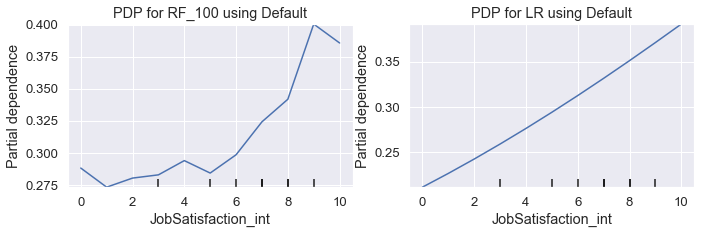

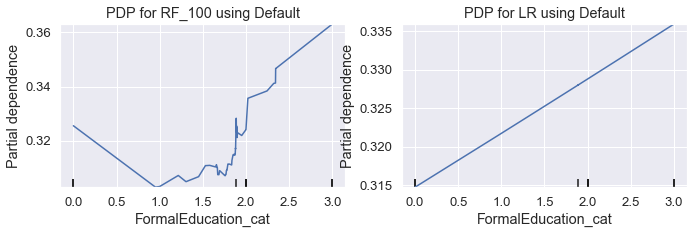

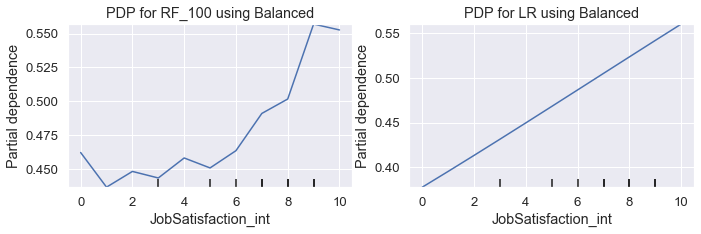

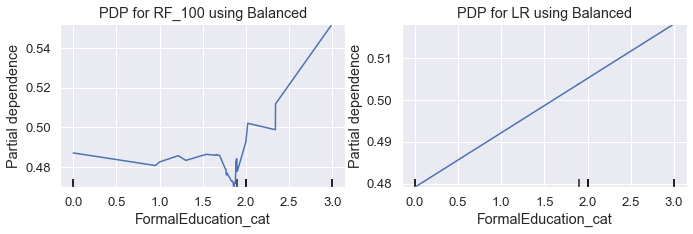

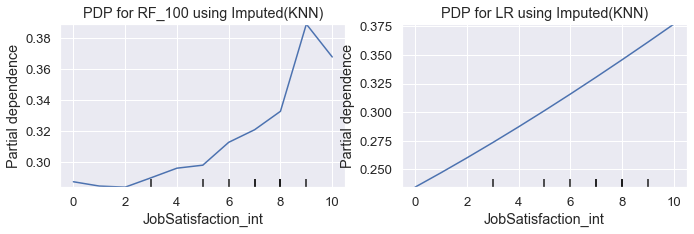

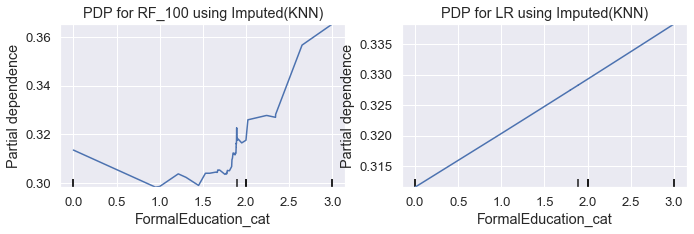

In [26]:
mlb.plot_partial_dependence(feature_set=['JobSatisfaction_int', 'FormalEducation_cat'])

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0


/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0


/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: This solver needs samples of at least 2 

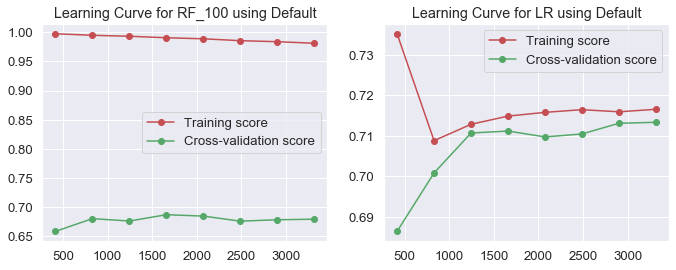

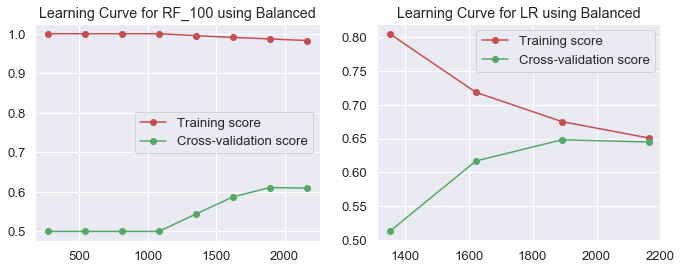

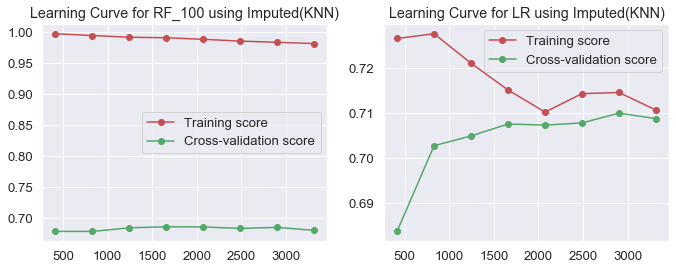

In [27]:
mlb.plot_learning_curve()